In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Waiting Times ##

Suppose you are running a sequence of trials. The *waiting time* of an event is the number of trials that you run till the event takes place. 

For example, suppose you roll are rolling a die. The waiting time till you see a six is the number of trials up to and including the trial that produced the first six.

The waiting time till you see 10 sixes is the number of trials up to and including the trial that produced the tenth six.

In this section we will find the distribution of the waiting time till a fixed number of successes in independent, repeated success/failure trials. The calculations are applications of independence and the binomial distribution. You have already done them in exercises in the previous chapter.

Please don't try to memorize the formulas. Instead, understand the logic. You will then be able to derive the formulas yourself when you need them, and you will know when to apply them.

### Waiting Time Till the First Success ###

Consider a sequence of independent and identically distributed (i.i.d.) trials, each of which results in success or failure. Let $p$ be the chance of success on any given trial. To avoid trivial cases, assume $0 < p < 1$.

Let $T_1$ be the number of trials till the first success. In this course, "till the first success" will mean "up to and including the trial that produced the first success."

The possible values of $T_1$ are $1, 2, 3, \ldots $. There is no upper limit, hence there are infinitely many possible values. 

For $k \ge 1$,

$$
\begin{align*}
&P(T_1 = k)\\
&= ~ P(\text{the first } k-1 \text{ trials are failures and trial } k \text{ is a success}) \\
&= ~ (1-p)^{k-1}p ~~~~~ \text{by independence}
\end{align*}
$$

The quantity $1-p$ appears frequently in calculations involving $p$, so probabilists often shorten it to $q$. In the rest of this section you can assume that $q = 1-p$.

The distribution of $T_1$ is called the *geometric $(p)$ distribution on* $\{1, 2, 3, \ldots \}$ and is given by

$$
P(T_1 = k) ~ = ~ q^{k-1}p, ~~~~~ k \ge 1
$$

Just to be sure that we do have a probability distribution, let's check that the probabilities sum to 1:

$$
\sum_{k=1}^\infty q^{k-1}p ~ = ~ p \sum_{k=1}^\infty q^{k-1} ~ = ~ p \cdot \frac{1}{1-q} ~ = ~ p \cdot \frac{1}{p} ~ = ~ 1
$$

Here is a histogram of the geometric $(1/6)$ distribution on $\{1, 2, 3, \ldots \}$. It is the distribution of the number of rolls of a die till the first six appears. Notice how the area of each bar is a fraction $q = 5/6$ of the previous bar. Also note that within about 30 rolls you are almost certain to see a six.

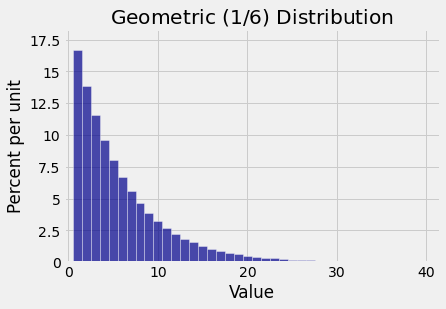

In [2]:
# NO CODE

N = 60
k = np.arange(1, N+1)
p = 1/6
q = 1 - p
geom_probs = (q**(k-1))*p
geom_dist = Table().values(k).probabilities(geom_probs)
Plot(geom_dist)
plt.xlim(-0.5, 41.5)
plt.title('Geometric $(1/6)$ Distribution');

The *right hand tail* probabilities of a distribution are probabilities of the form $P(X > k)$. The gold area in the figure below shows $P(X > 7)$ when $X$ has the geometric $(1/6)$ distribution shown above. You can see the reason for the term "right hand tail".

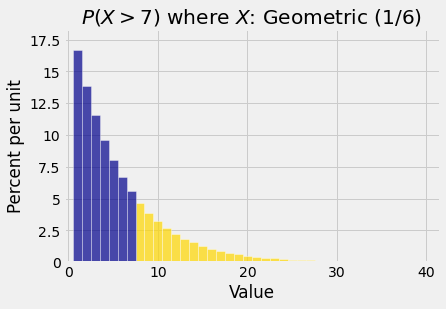

In [3]:
# NO CODE

Plot(geom_dist, event=np.arange(8, N+1))
plt.xlim(-0.5, 41.5)
plt.title('$P(X > 7)$ where $X$: Geometric $(1/6)$');

Right hand tail probabilities for waiting times are often straightforward to find. The tail probability at $k$ is the chance that the event you are waiting for hasn't happened yet by trial $k$.

Let $T_1$ be the waiting time till the first success, as in the calculations above. For $k \ge 1$ the right hand tail probability $P(X > k)$ is

$$
P(T_1 > k) ~ = ~ P(\text{first } k \text{ trials are failures}) ~ = ~ q^k
$$

The cdf of $T_1$ can now be found by complementation. Let $F_{T_1}$ denote the cdf of $T_1$. 

$$
F_{T_1}(k) ~ = ~ P(T_1 \le k) ~ = ~ 1 - P(T_1 > k) ~ = ~ 1 - q^k
$$

The tail probability and cdf can also be found by adding the appropriate terms in the distribution. But the method above is far easier! Understanding the events helps reduce calculation.

As an example, suppose there is a bet that I win with chance 1/100 every time I place the bet, independent of all other times. Let $W$ be the number of bets I place till I win for the first time. Find $P(W > 50)$ and $P(W = 50)$.

Since $W$ has the geometric $(0.01)$ distribution on $\{1, 2, 3, \ldots \}$, we know that

$$
P(W > 50) ~ = ~ P(\text{lose first 50 bets}) ~ = ~ 0.99^{50} ~ \approx ~ 60.5\%
$$

and 

$$
P(W = 50) ~ = ~ P(\text{lose first 49 bets, then win}) ~ = ~ 0.99^{49} \cdot 0.01 ~ \approx ~ 0.6111\%
$$

### Waiting Time Till the $r$th Success ###

The assumptions throughout this section are that you are running a sequence of i.i.d. success/failure trials with chance $p$ of success on each trial. 

Fix a positive integer $r$ and suppose you run the trials until you see $r$ successes. Let $T_r$ be the number of trials that you make.

We have already studied the case when you are waiting for just the first success and hence $r = 1$. Now we will generalize the calculation for the case when we are waiting for more than one success.

To find the distribution of $T_r$, we will start as always with the possible values. The smallest that $T_r$ can be is $r$, which happens when the first $r$ trials are successes. There is no upper limit to the values, so the possible values of $T_r$ are $k \ge r$, an infinite set. 

For $k \ge r$,

$$
\begin{align*}
&P(T_r = k) \\
&= ~ P(r-1 \text{ of the first } k-1 \text{ trials are successes and trial } k \text{ is a success}) \\
&= ~ \binom{k-1}{r-1}p^{r-1}q^{k-1-(r-1)} \cdot p \\
&= ~ \binom{k-1}{r-1}p^{r-1}q^{k-r} \cdot p
\end{align*}
$$

The right hand tail probability of $T_r$ at $k$ is

$$
\begin{align*}
&P(T_r > k) \\
&= ~ P(\text{at most } r-1 \text{ successes in the first } k \text{ trials}) \\
&= ~ \sum_{j=0}^{r-1} \binom{k}{j}p^jq^{k-j}
\end{align*}
$$

This is the cdf of the binomial $(k, p)$ distribution, evaluated at $r-1$.

Notice a duality: the *right* hand tail probability of $T_r$ is a *left* hand probability (cdf) of a binomial distribution.

As an example, suppose you bet repeatedly on a "split" at roulette. Your chance of winning is $2/38$ each time, independently of all other times. What is the chance that you need more than 200 bets to win 10 times?

This is the chance of winning at most 9 of the first 200 bets. By the binomial formula, this becomes

$$
P(\text{at most 9 wins in the first 200 bets}) ~ = ~ 
\sum_{j=0}^9 \binom{200}{j} (2/38)^j(36/38)^{200-j} ~ \approx ~ 38.92\%
$$

In [4]:
stats.binom.cdf(9, 200, 2/38)

0.38917804358004127